In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import copy
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,accuracy_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error

In [3]:
data=pd.read_csv('model_building_data.csv')

In [4]:
data.head()

,Unnamed: 0,Time,Ipv,Vpv,Vdc,ia,ib,ic,va,vb,vc,Iabc,If,Vabc,Vf,Defective_Non_Defective
0,0,5.155960,0.252922,1.318809e+24,3.221808e+06,0.383153,-0.484886,0.094108,-110.533069,150.276518,-39.751663,0.474142,5.928891,7.797750,7.607217e+22,0
1,1,2.229008,0.257513,3.355885e+23,3.507396e+06,0.039443,0.591468,-0.703177,-5.606410,-130.814844,136.577296,0.686795,5.917121,7.799511,7.621555e+22,0
2,2,3.975308,0.252829,1.372101e+24,3.221808e+06,0.302107,0.134714,-0.393086,-113.741968,-30.874331,146.974719,0.456084,5.918267,7.799787,7.634763e+22,1
3,3,0.686502,0.257665,2.382013e+23,3.552834e+06,0.241389,0.433822,-0.666618,-69.542671,-84.991691,153.915413,0.709654,5.934995,7.798507,7.604239e+22,1
4,4,0.551856,0.257408,2.433615e+23,3.575706e+06,0.477827,0.188832,-0.695855,-106.129905,-46.387067,150.571250,0.718551,5.918846,7.802388,7.626182e+22,1


In [5]:
data[data['Defective_Non_Defective']==0]

,Unnamed: 0,Time,Ipv,Vpv,Vdc,ia,ib,ic,va,vb,vc,Iabc,If,Vabc,Vf,Defective_Non_Defective
0,0,5.155960,0.252922,1.318809e+24,3.221808e+06,0.383153,-0.484886,0.094108,-110.533069,150.276518,-39.751663,0.474142,5.928891,7.797750,7.607217e+22,0
1,1,2.229008,0.257513,3.355885e+23,3.507396e+06,0.039443,0.591468,-0.703177,-5.606410,-130.814844,136.577296,0.686795,5.917121,7.799511,7.621555e+22,0
8,8,4.096285,0.252192,1.325736e+24,3.221808e+06,0.315608,0.168523,-0.492942,-89.506723,-63.794806,153.743200,0.503045,5.920373,7.799292,7.620114e+22,0
9,9,1.847916,0.257302,3.130609e+23,3.598679e+06,-0.695038,0.073987,0.492436,146.198883,-22.105289,-120.697369,0.744293,5.921925,7.810531,7.619469e+22,0
10,10,6.203256,0.253113,1.314865e+24,3.137284e+06,-0.275417,-0.193804,0.423287,87.598484,65.752717,-154.594637,0.467465,5.925243,7.802776,7.631803e+22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29973,29973,0.786283,0.258103,3.029638e+23,3.575706e+06,0.254877,0.399661,-0.703177,-62.075974,-91.048137,153.290639,0.680265,5.925581,7.799805,7.636829e+22,0
29984,29984,5.658368,0.253103,1.301148e+24,3.221808e+06,-0.067948,0.406490,-0.393086,9.737480,-137.861145,129.095322,0.486117,5.938155,7.798971,7.605300e+22,0
29990,29990,6.294937,0.257127,3.813830e+23,3.530065e+06,0.681103,-0.253614,-0.478609,-151.465603,51.455095,103.895562,0.747736,5.924098,7.805459,7.628955e+22,0
29997,29997,2.193066,0.257504,3.207687e+23,3.530065e+06,-0.462216,0.701599,-0.252440,109.401043,-150.650834,41.799486,0.710578,5.914942,7.801179,7.636264e+22,0


In [6]:
data.drop(columns='Unnamed: 0',inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Time                     30000 non-null  float64
 1   Ipv                      30000 non-null  float64
 2   Vpv                      30000 non-null  float64
 3   Vdc                      30000 non-null  float64
 4   ia                       30000 non-null  float64
 5   ib                       30000 non-null  float64
 6   ic                       30000 non-null  float64
 7   va                       30000 non-null  float64
 8   vb                       30000 non-null  float64
 9   vc                       30000 non-null  float64
 10  Iabc                     30000 non-null  float64
 11  If                       30000 non-null  float64
 12  Vabc                     30000 non-null  float64
 13  Vf                       30000 non-null  float64
 14  Defective_Non_Defectiv

In [8]:
data.columns

Index(['Time', 'Ipv', 'Vpv', 'Vdc', 'ia', 'ib', 'ic', 'va', 'vb', 'vc', 'Iabc',
       'If', 'Vabc', 'Vf', 'Defective_Non_Defective'],
      dtype='object')

In [9]:
X=data.drop(columns='Defective_Non_Defective')

In [10]:
y=data.Defective_Non_Defective

In [11]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [12]:
wcss

[8.466025329045378e+51,
 2.478319869507818e+50,
 1.8185816994836427e+50,
 7.178255763578149e+49,
 5.676391843668811e+49,
 4.0448981492400096e+49,
 2.9491556292160527e+49,
 2.2314168040281638e+49,
 1.737262120068535e+49,
 1.518219852445353e+49]

Text(0, 0.5, 'WCSS')

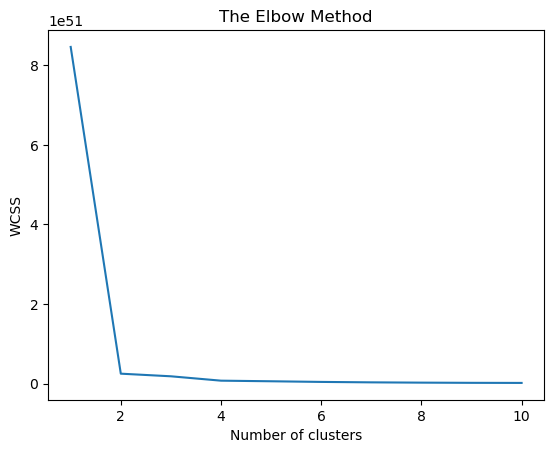

In [13]:
plt.plot(range(1,11),wcss) 
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [14]:
from kneed import KneeLocator

In [15]:
kn=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
kn.knee

2

In [16]:
kmeans = KMeans(n_clusters=kn.knee, init='k-means++', random_state=42)

In [17]:
cluster_no=kmeans.fit_predict(X)

In [18]:
pickle.dump(kmeans,open('KMean_cluster.pkl','wb'))

In [19]:
data['cluster']=cluster_no

In [20]:
data.head()

,Time,Ipv,Vpv,Vdc,ia,ib,ic,va,vb,vc,Iabc,If,Vabc,Vf,Defective_Non_Defective,cluster
0,5.155960,0.252922,1.318809e+24,3.221808e+06,0.383153,-0.484886,0.094108,-110.533069,150.276518,-39.751663,0.474142,5.928891,7.797750,7.607217e+22,0,0
1,2.229008,0.257513,3.355885e+23,3.507396e+06,0.039443,0.591468,-0.703177,-5.606410,-130.814844,136.577296,0.686795,5.917121,7.799511,7.621555e+22,0,1
2,3.975308,0.252829,1.372101e+24,3.221808e+06,0.302107,0.134714,-0.393086,-113.741968,-30.874331,146.974719,0.456084,5.918267,7.799787,7.634763e+22,1,0
3,0.686502,0.257665,2.382013e+23,3.552834e+06,0.241389,0.433822,-0.666618,-69.542671,-84.991691,153.915413,0.709654,5.934995,7.798507,7.604239e+22,1,1
4,0.551856,0.257408,2.433615e+23,3.575706e+06,0.477827,0.188832,-0.695855,-106.129905,-46.387067,150.571250,0.718551,5.918846,7.802388,7.626182e+22,1,1


In [21]:
data.cluster.value_counts()

cluster
0    19992
1    10008
Name: count, dtype: int64

In [22]:
models = {
    'LogisticRegression': LogisticRegression(random_state=30),
    'DecisionTree': DecisionTreeClassifier(random_state=30),
    'RandomForest': RandomForestClassifier(random_state=30),
    'SVM': SVC(random_state=42),
    'NaiveBayes': GaussianNB(),
    'XGBoost': xgb.XGBClassifier(objective='binary:logistic', random_state=30),
    'AdaBoost': AdaBoostClassifier(random_state=30),
    'KNN': KNeighborsClassifier()
}

In [23]:
best_models = {}

for cluster in data['cluster'].unique():
    cluster_data = data[data['cluster'] == cluster]
    X = cluster_data.drop(['Defective_Non_Defective', 'cluster'], axis=1)  
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    y = cluster_data['Defective_Non_Defective']  
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    
    print(f"\nCluster {cluster}:")
    best_accuracy = float("-inf")  
    best_model_name = None
    best_model = None
    
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        print(f"{model_name} Accuracy: {accuracy}")
        
        if accuracy > best_accuracy: 
            best_accuracy = accuracy
            best_model_name = model_name
            best_model = copy.deepcopy(model)
    
    print(f"Best model for Cluster {cluster} is {best_model_name} with Accuracy: {best_accuracy}")
    best_models[cluster] = best_model



Cluster 0:
LogisticRegression Accuracy: 0.8793517406962785
DecisionTree Accuracy: 0.9633853541416567
RandomForest Accuracy: 0.9821928771508603
SVM Accuracy: 0.9583833533413365
NaiveBayes Accuracy: 0.8185274109643857
XGBoost Accuracy: 0.9913965586234493


C:\Users\ASUS ZenBook\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.9559823929571829
KNN Accuracy: 0.8777511004401761
Best model for Cluster 0 is XGBoost with Accuracy: 0.9913965586234493

Cluster 1:
LogisticRegression Accuracy: 0.9940047961630696
DecisionTree Accuracy: 0.9960031974420464
RandomForest Accuracy: 0.9960031974420464
SVM Accuracy: 0.9960031974420464
NaiveBayes Accuracy: 0.9580335731414868
XGBoost Accuracy: 0.995603517186251


C:\Users\ASUS ZenBook\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.9960031974420464
KNN Accuracy: 0.9048760991207034
Best model for Cluster 1 is DecisionTree with Accuracy: 0.9960031974420464


In [24]:
X = data.drop(['Defective_Non_Defective', 'cluster'], axis=1) 

In [25]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [26]:
y=data.Defective_Non_Defective

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
xgb = xgb.XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [29]:
y_pred = xgb.predict(X_test)

In [30]:
accuracy_score(y_test, y_pred)

0.9937777777777778

In [39]:
pickle.dump(xgb,open('xgb.pkl','wb'))

In [41]:
#regularization

In [36]:
import xgboost as xgb
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
params = {
    'objective': 'binary:logistic',
    'eta': 0.1,
    'max_depth': 4,
    'gamma': 0.05,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'n_estimators': 1000,
    'reg_alpha': 0.1,   
    'reg_lambda': 0.1,  
    'random_state': 42
}

In [38]:
xgb_model = xgb.XGBClassifier(**params)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric=None,
              feature_types=None, gamma=0.05, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=None, num_parallel_tree=None, ...)

In [39]:
y_pred=xgb_model.predict(X_test)

In [40]:
accuracy = accuracy_score(y_test,y_pred )
accuracy

0.9945

In [41]:
train_predictions = xgb_model.predict(X_train)
train_rmse = mean_squared_error(y_train, train_predictions, squared=False)
train_rmse

C:\Users\ASUS ZenBook\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.0

In [42]:
test_predictions = xgb_model.predict(X_test)
test_rmse = mean_squared_error(y_test, test_predictions, squared=False)
test_rmse

C:\Users\ASUS ZenBook\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.07416198487095663

In [44]:
pickle.dump(xgb_model,open('xgb_model.pkl','wb'))

In [31]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2]
}

In [32]:
import xgboost as xgb
xgb = xgb.XGBClassifier(objective='binary:logistic', random_state=42)